# Machine Learning, Neural Networks, Deep Learning, and Transformers

## Table of Contents

* [Machine Learning Overview](#machine_learning_overview)
* [The Perceptron](#the_perceptron)
    * [Perceptron Example in Python](#perceptron_example_in_python)
    * [The Perceptron and Non-Linearly Separable Datasets](#the_perceptron_and_non-linearly_separable_datasets)
* [From the Perceptron to Neural Networks](#from_the_perceptron_to_neural_networks)
* [Sources](#sources)

## Machine Learning Overview <a id="machine_learning_overview"></a>
Machine Learning is the **artificial generation of knowledge from experience**, i.e., a system is trained to solve a problem instead of explicitly programming the rules. During a **learning phase** (or **training phase**), the system learns from examples. Afterwards, it should be able to generalize from these examples. The goal of learning/training is to let the algorithm build a statistical model by recognizing patterns and regularities in a set of training data. This model is then tested against test data as it should be able to make predictions for new, unseen data. Machine learning can be used for many problems, providing a wide range of techniques, e.g.:

* **Regression**: linear and logistic regression, naive Bayes
* **Classification**: support vector machines, decision trees (including random forests and boosting)
* **Clustering**: k-means, k-NN, DBSCAN
* **Dimensionality reduction**: principal component analysis (PCA), t-SNE

The following are the most important paradigms of machine learning:

* **Supervised learning**: the data consists of labeled examples, i.e., each data point contains features (= covariates) and an associated label. The goal of supervised learning algorithms is to learn a function that maps feature vectors (inputs) to labels (output). This function is infered from labeled training data, i.e., features are learned using labeled input data. Each example is a pair consisting of an input object (typically a vector) and a desired output value. The function produced by the algorithm can be used for mapping new examples, e.g., for classifying unseen instances.
* **Semi-supervised learning (weak supervision)**: during training, a small set of labeled data is combined with a large set of unlabeled data. This approach results from situations where unlabeled data is abundant and labeled data is expensive to obtain. The algorithm is provided with unlabeled data and supervision examples (but not necessarily for all examples). High-level assumption about the smoothness, low-dimensional structure, or distance metrics of the labeled data are used to infer the correct labels for the unlabeled data.
* **Unsupervised learning**: the algorithm learns patterns from unlabeled input data. It is often used to discover hidden patterns (anomaly detection) and data groupings (clustering), or to perform principal component analysis for dimensionality reduction.
* **Self-supervised learning**: the algorithm does not need human-annotated labels and is fed unlabeled data. Usually, the neural network is first presented with a pretext task to initialize the model parameters. This task is often based on pseudo labels that have been derived from the unlabeled input data. Afterwards, a downstream task (i.e., the actual task) is solved utilizing supervised or unsupervised learning.

## The Perceptron <a id="the_perceptron"></a>

At its core, a neural network is a collection of simple processing units (**perceptrons**). The concept of a "neuron" was first introduced in 1943 by Warren McCulloch and Walter Pitts (McCulloch-Pitts neuron),<a name="footnote_ref-1"></a>[<sup>1</sup>](#footnote-1) the first implementation of a perceptron was built in 1958 by Frank Rosenblatt.<a name="footnote_ref-2"></a>[<sup>2</sup>](#footnote-2) The perceptron is a **linear classifier** (also known as **threshold processing unit**) and consists of the following components:
* A set of inputs, consisting of
    * input information ($X_1 \ldots X_n$), and
    * weights ($w_1 \ldots w_n$),
* A bias ($X_0$, where $X_0=1$). The bias is necessary to shift the activation function (see below) to the left or right. This is critical for successful learning, as it gives the algorithm more flexibility.
* A sum function to aggregate the inputs, and
* An activation function which leads to a single output.

![A single perceptron](img/perceptron.png)

The weights $w_1 \ldots w_n$ are the heart of the perceptron, as they determine the strength of each input signal to it, i.e., the input signals $X_1 \ldots X_n$ interact multiplicatively with the weights (e.g., $X_1 \times w_1$). The perceptron then computes the weighted sum of the inputs (i.e., it calculates a dot product with the input and its weights) and adds the bias to it:

$$z = {\sum_{i} X_i w_i} + X_0 w_0$$

Afterwards, an activation function is applied, i.e., a mathematical function to determine the output given its input. In other words, the activation function specifies if the perceptron will be activated or not. Perceptrons generally use a threshold activation function which determines the activation decision through a combination fo the sum function's input and a throshold value. In this example, the **Heaviside step function** is used. It outputs $1$ if the input value (the result of the sum function) is $\ge 0$ and $0$ if the input value is $< 0$:

$$H(x) = \begin{cases} 1 \text{ if } x \ge 0 \\ 0 \text{ if } x < 0 \end{cases}$$

The algorithm to use a perceptron as a linear classifier therefore works as follows:<a name="footnote_ref-3"></a>[<sup>3</sup>](#footnote-3)
1. Initialize the weights (either by assigning them the value 0 or another small random value).
2. For each training sample $X_n$:
    1. Calculate the output value, i.e., multiply the input with its weight, add the bias and apply the activation function.
    2. Compare the prediction with the desired output and update the weights
        1. If the output is correct, the weight remains unchanged.
        2. If the output is 0 but should be 1, the weights are incremented.
        3. If the output is 1 but should be 0, the weights are decremented.
    3. Repeat until the model converges.

The following image shows the usage of a perceptron as a **linear classifier**. There are 2 classes (red and blue) and 2 dimensions ($X_1$ and $X_2$). The goal is to fit an optimal  hyperplane that correctly separates the data into two classes. It takes the result of $\sum_{i} X_n w_n + X_0 w_0$ (i.e., the **activation**) and determines whether a data point is below or above the hyperplane. If the activation is $ \ge 0$, the model outputs 1, if the activation is $< 0$, it outputs 0.<a name="footnote_ref-4"></a>[<sup>4</sup>](#footnote-4)

![Perceptron as linear classifier](img/perceptron_linear_classifier.png)

### Perceptron Example in Python <a id="perceptron_example_in_python"></a>

The following example ins an implementation of the perceptron with randomly generated synthetic data. For convenience, linearly separable data is generated with the `make_blobs` function from *scikit-learn*. It outputs two *NumPy* arrays:
* `X` is a 2-dimensional array containing the characteristics of the data points (in this case x and y values which can be viewed as coordinates).
* `y` is a 1-dimensional array containing the class labels (*0* or *1*).

The sample data consists of two normally distributed clusters of data points with a label assigned to each cluster.<a name="footnote_ref-5"></a>[<sup>5</sup>](#footnote-5) The data set is plotted below; the data with class label *0* is displayed in green, the data with class label *1* is displayed in blue.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

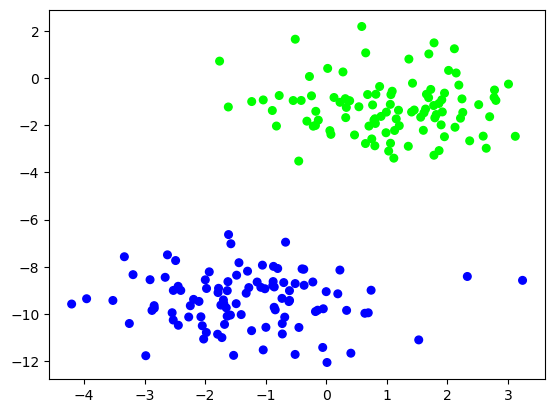

In [2]:
np.random.seed(1)

# Generate a linearly separable dataset
X, y = datasets.make_blobs(n_samples = 200,
                           n_features = 2,
                           centers = 2,
                           cluster_std = 1.1,
                           random_state = 2)

# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.brg)
plt.show()

Now, two functions are defined: `train_perceptron` to train the perceptron on training data, and `predict_perceptron` to make predictions on test data.<a name="footnote_ref-6"></a>[<sup>6</sup>](#footnote-6)

The first part of the training function is straightforward: calculate the dot product of input and weight, add the bias, and pass the result through the Heaviside activation function (which is imported from *NumPy*).

Then the weights and bias are updated according to the algorithm:
* The comparison between actual value and predicted value happens in the `(y[i] - y_pred[i])` part:
    * If the prediction is correct, this part results in 0 and the weight remains unchanged.
    * If the prediction is 0 but should be 1, the weights are incremented due to the positive sign of the subtraction result.
    * If the prediction is 1 but should be 0, the weights are decremented due to the negative sign of the subtraction result.
* The new weight is then calculated with inputs from the learning rate and the training training data, e.g. for the initial iteration:

$$\underbrace{0}_{\text{bias}} \times \underbrace{(1 - 0.0)}_{\text{actual vs pred}} \times \underbrace{0.31994533}_{\text{input} X_{1_1}}
$$

$$
\underbrace{0}_{\text{bias}} \times \underbrace{(1 - 0.0)}_{\text{actual vs pred}} \times \underbrace{-1.67994085}_{\text{input} X_{1_2}}
$$

The function also takes two **hyperparameters** that are used by the supervisor to directly control the perceptron's behavior and tune the training process:
* **Epochs**: an epoch is an entire passing of the training data through the algorithm (as training data is usually broken down into smaller batches to circumvent storage space limitations).
* **Learning rate**: the learning rate controls who much the model changes in response to the estimated error when the weights are updated. This is one of the most important parameters. If the parameter is too small, the learning process might be prolonged and might get stuck, if it is too big, the changes to the weights might be too severe and the result might not be optimal.

In [3]:
def train_perceptron(X, y, weights, bias, epochs, learning_rate):
    """Implementation of the perceptron training algorithm.
    
    Args:
    X             -- Input data (NumPy array)
    y             -- Classes of the input data (NumPy array)
    weights       -- Weight vector (NumPy array)
    bias          -- Initial bias (float or integer)
    epochs        -- Number of epochs (hyperparameter - float or integer)
    learning_rate -- Learning rate (hyperparameter - float or integer)
    """
    for epoch in range(epochs):
        # For each training example
        for i in range(len(X)):
            # Calculate output value (dot product of input and weight + bias)
            z = np.dot(X, weights) + bias
            # Pass the output through the activation function to calculate the prediction
            y_pred = np.heaviside(z, 0)
            
            # Update the weights and bias
            weights = weights + learning_rate * (y[i] - y_pred[i]) * X[i]
            bias = bias + learning_rate * (y[i] - y_pred[i])
        
        # Print current progress
        if epoch % 10 == 0:
            print(f"Epoch {epoch} complete.")
        elif epoch == epochs - 1:
            print("Training complete.")
        else:
            pass
        
    return weights, bias
    
def predict_perceptron(X, weights, bias):
    """Predict the class of input data
    
    Args:
    X       -- Input data (NumPy array)
    weights -- Weight vector (NumPy array)
    bias    -- Bias (float)
    """
    z = np.dot(X, weights) + bias
    prediction = np.heaviside(z, 0)
    return prediction

Now, the parameters will be initialized and the dataset is prepared for training. The weights and the bias are both set to 0, but any random small value can be used instead. The `train_test_split` function is imported from *scikit-learn* to easily split the data into a training and a test set. In this case, an 80:20 rate (80% training data/20% test data) is chosen via the `test_size` parameter. 

In [4]:
from sklearn.model_selection import train_test_split

# Initialize parameters
weights = np.zeros(X.shape[1])
bias = 0

# Define the hyperparameters
learning_rate = 0.01
epochs = 100

# Split the dataset into test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Now the model can be trained with the `train_perceptron` function defined above. It returns the learned weights and bias which are saved to corresponding variables. 

In [5]:
weights_learned, bias_learned = train_perceptron(X_train, y_train, weights, bias, epochs, learning_rate)
print(10 * "-")
print(f"Learned weights: {weights_learned}")
print(f"Learned bias: {bias_learned}")

Epoch 0 complete.
Epoch 10 complete.
Epoch 20 complete.
Epoch 30 complete.
Epoch 40 complete.
Epoch 50 complete.
Epoch 60 complete.
Epoch 70 complete.
Epoch 80 complete.
Epoch 90 complete.
Training complete.
----------
Learned weights: [0.03473729 0.03384782]
Learned bias: 0.11999999999999998


We can now use the learned parameters to make predictions with the unseen test data set `y_test` using the previously defined `predict_perceptron` function. This function multiplies the test input values by the learned weights and adds the learned bias. The resulting score is passed through the Heaviside step function to obtain the predicted class of each input.

In [6]:
pred = predict_perceptron(X_test, weights_learned, bias_learned)

We can now determine the quality of the model's prediction by comparing the trained class labels with the actual class labels in a **confusion matrix**. For this purpose, two corresponding functions are imported from *scikit-learn*: `confusion_matrix`<a name="footnote_ref-7"></a>[<sup>7</sup>](#footnote-7) for creating the matrix, and `ConfusionMatrixDisplay`<a name="footnote_ref-8"></a>[<sup>8</sup>](#footnote-8) for plotting it in a nice manner.

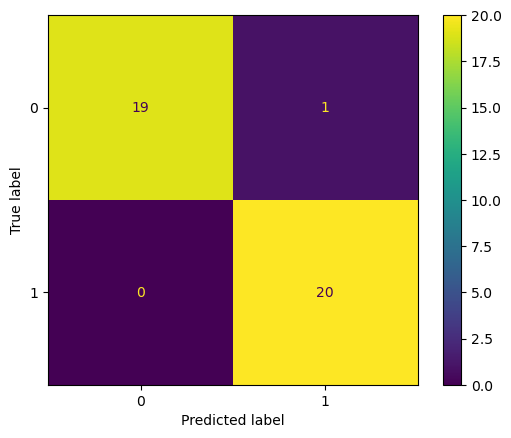

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf = confusion_matrix(pred, y_test)
disp = ConfusionMatrixDisplay(conf)
disp.plot()
plt.show()

The confusion matrix displays a comparison between the predicted class labels and the actual class labels in the following way:

```
┌─────────────────────┬─────────────────────┐
│ True Positive (TP)  │ False Negative (FN) │
├─────────────────────┼─────────────────────┤
│ False Positive (FP) │ True Negative (TN)  │
└─────────────────────┴─────────────────────┘
```

It shows that one class label has been misclassified: one data point of class 0 (i.e., the class plotted in green) has been classified as class 1.

The quality of the model's prediction can also be determined in the form of a **classification report**. The report is obtained via the `classification_report`<a name="footnote_ref-9"></a>[<sup>9</sup>](#footnote-9)<sup>,</sup> <a name="footnote_ref-10"></a>[<sup>10</sup>](#footnote-10) function from *scikit-learn*.

In [8]:
from sklearn.metrics import classification_report

report = classification_report(pred, y_test, digits = 2, zero_division = 0.0)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        20
         1.0       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



The classification report provides the following metrics to quantify the quality of the model's predictions:

* **Precision** (also known as **positive predictive value**): the model's ability to correctly label a sample (i.e., to not label a positive sample as negative).<a name="footnote_ref-11"></a>[<sup>11</sup>](#footnote-11) It is defined as

$$P = \frac{\text{relevant retrieved instances}}{\text{all retrieved instances}} = \frac{TP}{TP + FP}$$

* **Recall** (also known as **sensitivity**): the model's ability to find all relevant (e.g., positive) samples.<a name="footnote_ref-11"></a>[<sup>11</sup>](#footnote-11) It is defined as

$$R = \frac{\text{relevant retrieved instances}}{\text{all relevant instances}} = \frac{TP}{TP + FN}$$

* **F1-score** (also known as **balanced F-score**): a combination of precision and recall by calculating their harmonic mean.<a name="footnote_ref-12"></a>[<sup>12</sup>](#footnote-12) It is defined as

$$F = 2 \frac{P \cdot R}{P + R}$$

* **Support**: the number of occurrences of each class.

* **Accuracy**: the model's ability to correctly identify or exclude a condition, i.e., the proportion of correct predictions - true positives and true negatives - among the total number of cases examined.<a name="footnote_ref-13"></a>[<sup>13</sup>](#footnote-13) It is defined as

$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

The precision, recall, and F1 scores are slightly below 1.00, which is a result of the misclassified data point. 

Finally, we can plot the result, i.e., the **decision boundary**. The `plot_perceptron` function defined below calculates the end points of the decision boundary hyperplane so that a line can be plottet between the two. The equation for a straight line is

$$y = mx + b$$

with $m$ being the slope and $b$ being the Y intercept. First, we determine the data points with the highest and lowest coordinate value on the x axis (`x1`). $m$ can be calculated as

$$m = \frac{\text{Change in y}}{\text{change in x}}$$

where the changes are represented by the weights. $b$ is the value of $y$ when $x=0$. The $x$ value can then be plugged into the equation to give us the other end point of the line. Then, the individual data sets (test set, training set, and entire dataset) are plotted with the decision boundary.

In [9]:
def plot_perceptron(X_test, y_test, X_train, y_train, X, y, weights, bias):
    """Plot the input of a perceptron with the decision boundary.
    
    Args:
    X_test  -- Test data to plot (numpy array)
    y_test  -- Test classification lables (numpy array)
    X_train -- Training data to plot (numpy array)
    y_train -- Training classification lables (numpy array)
    X       -- Dataset to plot (numpy array)
    y       -- Classification lables (numpy array)
    weights -- Weight vector of the trained perceptron (numpy array)
    bias    -- Bias of the trained perceptron (float)
    """
    # Calculate the decision boundary
    x1 = np.array([min(X_train[:,0]), max(X_train[:,0])])
    m = -weights[0] / weights[1]
    b = np.array([-bias / weights[1]])
    x2 = m * x1 + b
    
    # Generate plot and subplots; general formatting
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex = True, sharey = True)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    fig.suptitle("Perceptron decision boundary", fontsize = 12)
    
    # Generate subplot for test data
    ax1.scatter(X_test[:, 0], X_test[:, 1], c = y_test, s = 30, cmap = plt.cm.brg)
    ax1.plot(x1, x2, c = "r")
    ax1.set_title("Test data", fontsize = 10)
    
    # Generate subplot for training data 
    ax2.scatter(X_train[:, 0], X_train[:, 1], c = y_train, s = 30, cmap = plt.cm.brg)
    ax2.plot(x1, x2, c = "r")
    ax2.set_title("Training data", fontsize = 10)
    
    # Generate subplot for entire dataset
    ax3.scatter(X[:, 0], X[:, 1], c = y, s = 30, cmap = plt.cm.brg)
    ax3.plot(x1, x2, c = "r")
    ax3.set_title("Entire dataset", fontsize = 10)
    
    plt.show()

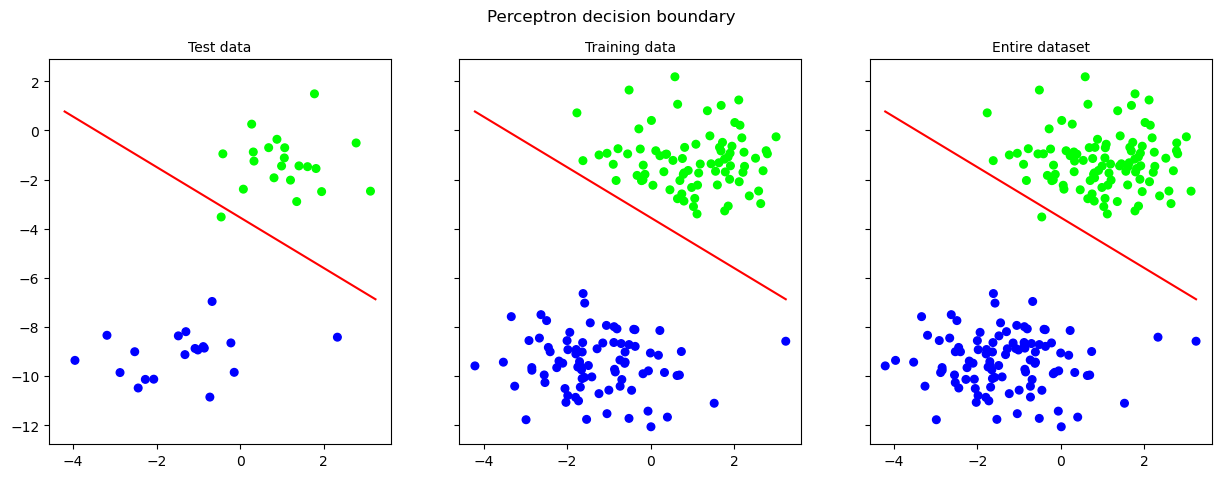

In [10]:
plot_perceptron(X_test, y_test, X_train, y_train, X, y, weights_learned, bias_learned)

The plots visually show the data point that has been misclassified as identified by the confusion matrix and the classification report. It also visualizes the reason for the misclassification: it is due to the split of the training data set. The decision boundary as learned by the model splits the training data perfectly, but one data point of the test data is below the decision boundary.

Finally, we can also train a second perceptron by using **scikit-learn's `Perceptron` class**. This class comes with many functions which make training a perceptron very easy.

In [11]:
from sklearn.linear_model import Perceptron
skl_perceptron = Perceptron(random_state = 1)
skl_fit = skl_perceptron.fit(X_train, y_train)
skl_score = skl_perceptron.score(X_test, y_test)

print(skl_score)

0.975


The accuracy score for the sklearn model is the same as for the implementation from scratch, which means that the same data point as above has likely been misclassified.

### The Perceptron and Non-Linearly Separable Datasets <a id="the_perceptron_and_non-linearly_separable_datasets"></a>

A single perceptron has a major drawback: it only works for data that is linearly separable. This is due to the way the algorithm works as it is based on the idea of adjusting the weights until the output of the perceptron matches the desired output. If applied to linearly separable data, the perceptron algorithm is **guaranteed to converge**, i.e., it is able to find a set of weights that allows it to correctly classify all training examples.

However, this is not the case with data that is not linearly separable as shown below. The following function generates a spiral dataset that cannot be seperated linearly. It takes 3 arguments (number of points per class, number of dimensions, and number of classes) to easily create different suitable datasets.

In [12]:
def generate_spiral_dataset(N, D, K):
    """Generate a spiral dataset.
    
    Args:
    N -- Number of points per class (integer)
    D -- Number of dimensions (integer)
    K -- Number of classes (integer)
    """
    # Calculate the rotation
    rotation = np.pi * 2 * 2

    # Generate data points for each class
    for k in range(K):
        # Create empty arrays during the first iteration of the loop
        if k == 0:
            # Create empty 2-dimensional array for the synthetic data points.
            # Dimension 1 = size N*K, dimension 2 = size D
            X = np.zeros((N*K, D))
            # Create empty 1-dimensional array for class labes of size N*K
            y = np.zeros(N*K, dtype="uint8")  
        
        # Generate N evenly spaced numbers in interval [0.05,1]    
        radius = np.linspace(0.05, 1, N)
        # Calculate the angle
        theta = np.linspace((k-1)*rotation/(K+1-K%2), k*rotation/(K+1-K%2), N) + np.random.randn(N)*0.2
        # Get range of current class
        current_class_range = range(N*k, N*(k+1))
        
        # Calculate data point coordinates and concatenate the two arrays along the second axis.
        X[current_class_range] = np.c_[radius*np.sin(theta), radius*np.cos(theta)]
        # Fill label array with class labels
        y[current_class_range] = k
        
    return X, y

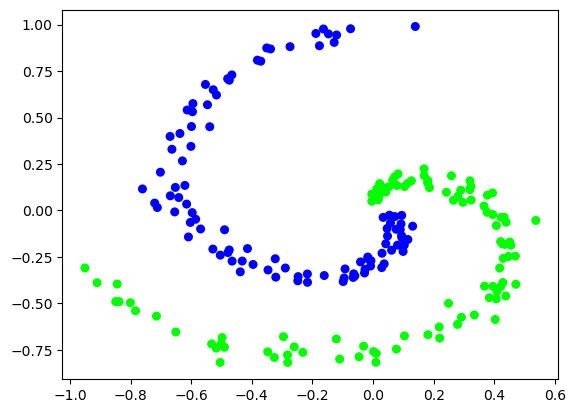

In [13]:
np.random.seed(1)
X_spiral, y_spiral = generate_spiral_dataset(100, 2, 2)

plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c = y_spiral, s = 30, cmap = plt.cm.brg)
plt.show()

Now, we will go through the same steps as with the linearly separable dataset above:

1. Parameter initialization
1. Hyperparameter definition
1. Test/train split
1. Model training
1. Prediction generation on test data
1. Print classification report
1. Plot the decision boundary

Epoch 0 complete.
Epoch 10 complete.
Epoch 20 complete.
Epoch 30 complete.
Epoch 40 complete.
Epoch 50 complete.
Epoch 60 complete.
Epoch 70 complete.
Epoch 80 complete.
Epoch 90 complete.
Training complete.
----------
Learned weights: [ 0.00944065 -0.0199036 ]
Learned bias: 0.01
----------

 Classification Report:
              precision    recall  f1-score   support

         0.0       0.48      0.50      0.49        20
         1.0       0.47      0.45      0.46        20

    accuracy                           0.48        40
   macro avg       0.47      0.47      0.47        40
weighted avg       0.47      0.47      0.47        40



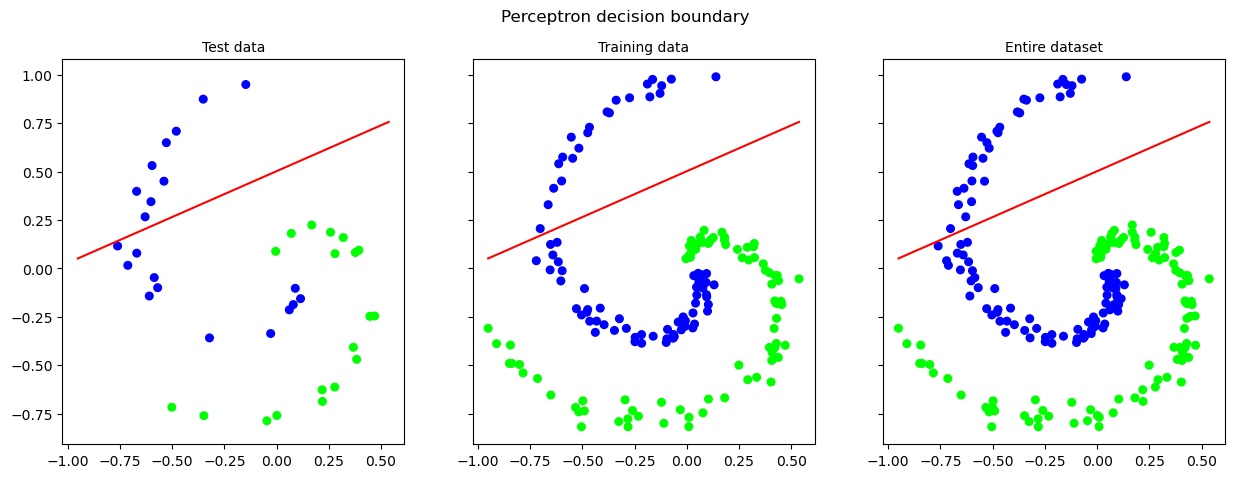

In [14]:
# Parameter initialization
weights_spiral = np.zeros(X_spiral.shape[1])
bias_spiral = 0

# Hyperparameter definition
learning_rate_spiral = 0.01
epochs_spiral = 100

# Test/train split
X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(X_spiral, y_spiral, test_size = 0.2, random_state = 42)

# Model training
weights_spiral_learned, bias_spiral_learned = train_perceptron(X_spiral_train, y_spiral_train, weights_spiral, bias_spiral, epochs_spiral, learning_rate_spiral)
print(10 * "-")
print(f"Learned weights: {weights_spiral_learned}")
print(f"Learned bias: {bias_spiral_learned}")

# Test data prediction
pred_spiral = predict_perceptron(X_test, weights_learned, bias_learned)

# Print classification report
report_spiral = classification_report(pred_spiral, y_spiral_test, digits = 2, zero_division = 0.0)

print(10 * "-")
print("\n Classification Report:")
print(report_spiral)

# Plot decision boundary
plot_perceptron(X_spiral_test, y_spiral_test, X_spiral_train, y_spiral_train, X_spiral, y_spiral, weights_spiral_learned, bias_spiral_learned)

## From the Perceptron to Neural Networks <a id="from_the_perceptron_to_neural_networks"></a>

To be able to separate non-linearly separable datasets, multiple perceptrons can be combined into a structure known as **multi-layer perceptron** (MLP), a simple type of neural networks (also referred to as *vanilla neural network*). MLPs are able to solve non-linear problems, as they can use non-linear activation functions, commonly Sigmoid functions or Rectified Linear Unit (ReLU). Formally, "true" perceptrons are a special case of artificial neurons that use a threshold activation function (such as Heaviside) and only perform binary classification.<a name="footnote_ref-14"></a>[<sup>14</sup>](#footnote-14) Combining multiple perceptrons into a neural network basically has two effects:

1. Neural networks are able to store more information with increasing complexity (due to an increased number of parameters).
2. MLP neurons can perform regression **or** classification, depending on their activation function.

In a neural network, the output of some neurons becomes the inputs of other neurons. The **network topology** describes the number of neurons and the number of layers they are organized in, the most common type being **fully-connected layers** where neurons between two adjacent layers are fully pairwise connected, but no neurons share connections within the same layer. Neural networks have three types of layers:

1. Input layer
2. Hidden layer(s)
3. Output layer

When determining the number of layers in a network, the input layer is not counted. Therefore, the following image displays a 2-layer and a 3-layer neural network:

![Neural Network](img/neural_networks.png)

There are different types of neural networks, with the type being determined by the information flow within the network:

* **Feed-forward neural networks**: information can only flow in one direction, from the input layer to the output layer.
* **Recurrent neural networks**: connections between nodes can create a cycle, i.e., neurons can be connected to neurons from the same layer or a previous layer. Information from previous throughputs can be used to affect the current inputs and/or outputs.
* **Neural networks with backpropagation**: the model performs a backward pass to adjust its parameters. The output from the forward propagation is compared to the desired output and the difference betweent the two is considered the error $E$. The error is propagated backwards through the network and the weights are changed depending on their influence on the error $E$.

## Sources <a id="sources"></a>

<a name="footnote-1"></a><sup>1</sup> [McCulloch, W., Pitts, W. (1943), A Logical Calculus of Ideas Immanent in Nervous Activity, *Bulletin of Mathematical Biophysics* **5**, 127--147.](https://jontalle.web.engr.illinois.edu/uploads/410-NS.F22/McCulloch-Pitts-1943-neural-networks-ocr.pdf) [$\uparrow$](#footnote_ref-1) <br>
<a name="footnote-2"></a><sup>2</sup> [Rosenblatt, F. (1957), *The Perceptron. A Perceiving and Recognizing Automaton*, Report 85-460-1, Cornell Aeronautical Laboratory, Buffalo, NY.](https://blogs.umass.edu/brain-wars/files/2016/03/rosenblatt-1957.pdf) [$\uparrow$](#footnote_ref-2) <br>
<a name="footnote-3"></a><sup>3</sup> [Wikipedia (2023). *Perceptron*.](https://en.wikipedia.org/wiki/Perceptron#Steps) [$\uparrow$](#footnote_ref-3) <br>
<a name="footnote-4"></a><sup>4</sup> [Brownlee, J. (2020). *Perceptron Algorithm for Classification in Python*.](https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/), see also [Raschka, S. (2015). *Single-Layer Neural Networks and Gradient Descent*.](https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html) [$\uparrow$](#footnote_ref-4) <br>
<a name="footnote-5"></a><sup>5</sup> [scikit-learn User Guide (2023). *Generated datasets*](https://scikit-learn.org/stable/datasets/sample_generators.html) [$\uparrow$](#footnote_ref-5) <br>
<a name="footnote-6"></a><sup>6</sup> With some inspiration from [Sidhart (2023). *The Perceptron Algorithm: From Scratch Using Python*.](https://www.pycodemates.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html) [$\uparrow$](#footnote_ref-6) <br>
<a name="footnote-7"></a><sup>7</sup> [scikit-learn Documentation (2023). *sklearn.metrics.confusion_matrix*.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) [$\uparrow$](#footnote_ref-7) <br>
<a name="footnote-8"></a><sup>8</sup> [scikit-learn Documentation (2023). *sklearn.metrics.ConfusionMatrixDisplay*.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) [$\uparrow$](#footnote_ref-8) <br>
<a name="footnote-9"></a><sup>9</sup> [scikit-learn Documentation (2023). *sklearn.metrics.classification_report*.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) [$\uparrow$](#footnote_ref-9) <br>
<a name="footnote-10"></a><sup>10</sup> [scikit-learn User Guide (2023). *Classification Report*.](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) [$\uparrow$](#footnote_ref-10) <br>
<a name="footnote-11"></a><sup>11</sup> [Wikipedia (2023). *Precision and recall*.](https://en.wikipedia.org/wiki/Precision_and_recall) [$\uparrow$](#footnote_ref-11) <br>
<a name="footnote-12"></a><sup>12</sup> [Wikipedia (2023). *F-score*.](https://en.wikipedia.org/wiki/F-score) [$\uparrow$](#footnote_ref-12) <br>
<a name="footnote-13"></a><sup>13</sup> [Wikipedia (2023). *Accuracy and precision*.](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification
) [$\uparrow$](#footnote_ref-13) <br>
<a name="footnote-14"></a><sup>14</sup> [Wikipedia (2023). *Multilayer perceptron*.](https://en.wikipedia.org/wiki/Multilayer_perceptron) [$\uparrow$](#footnote_ref-14) <br>
